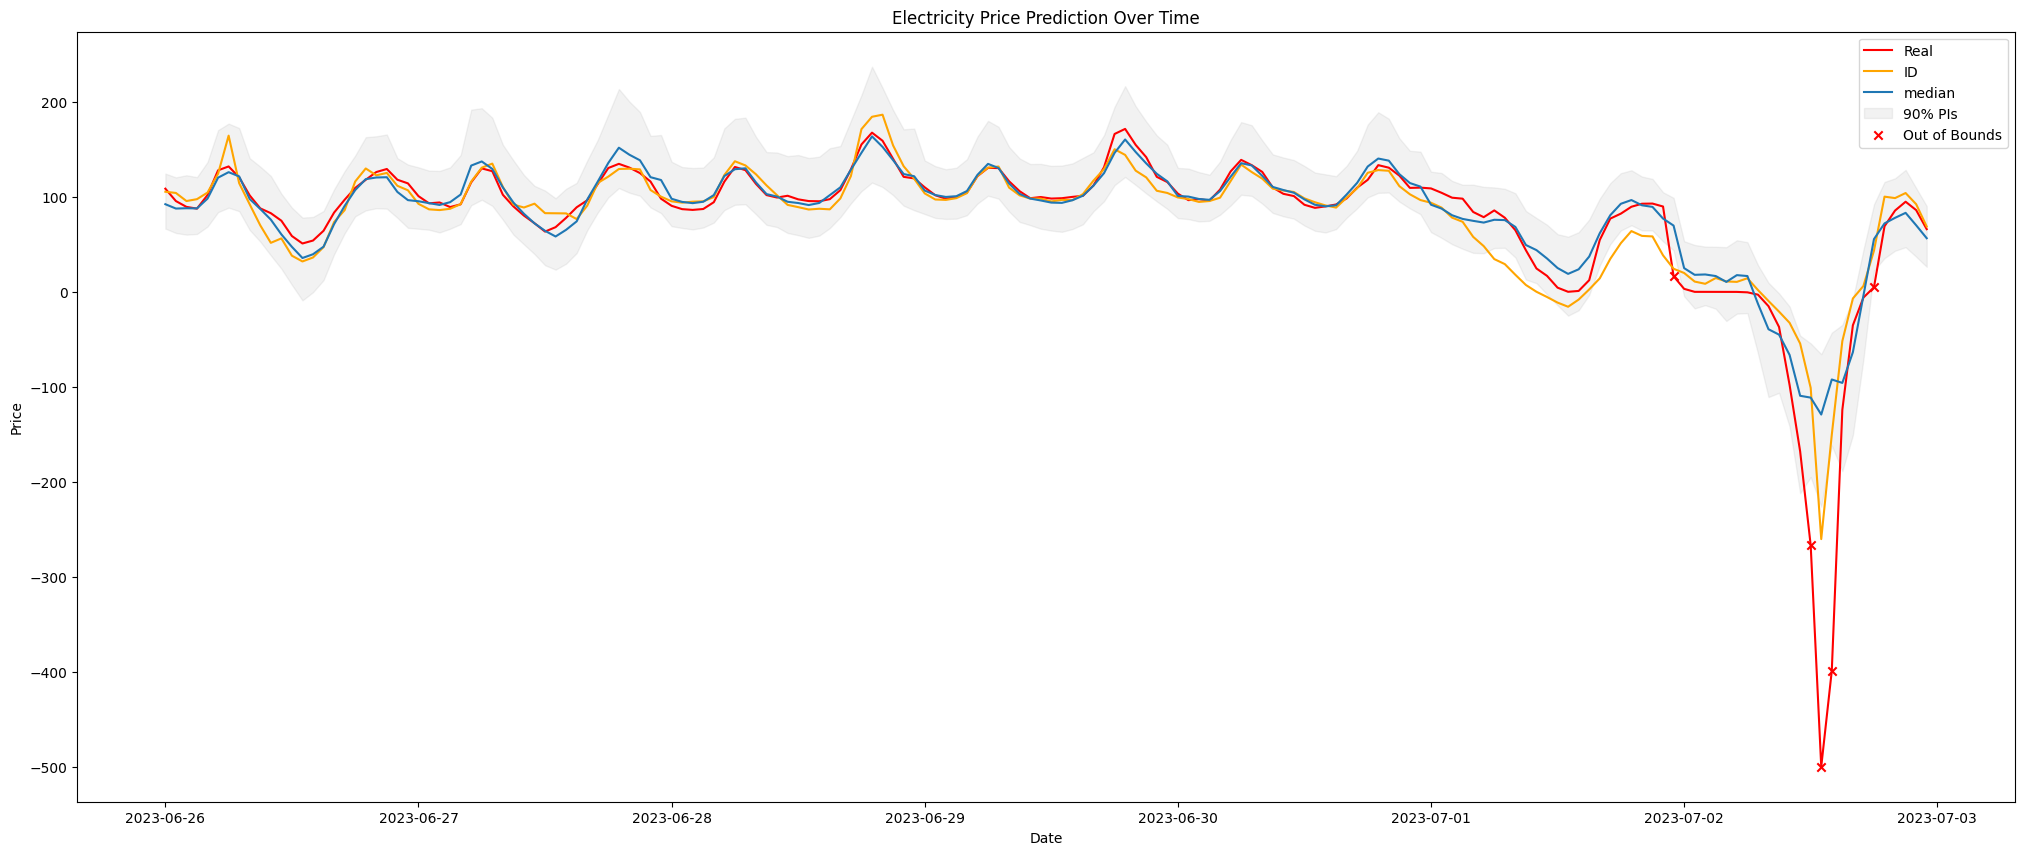

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to the CSV file
csv_file_path = "forecasts_ddnn_7/prediction_ensembled.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file_path, index_col=0)

# Convert the index to a DateTime object
data.index = pd.to_datetime(data.index)

# skip first 24 hours
# data = data.iloc[24:]
# only 2023-07-01 to 2023-07-4
data = data.loc['2023-06-26':'2023-07-02']


# import de data
data_de = pd.read_csv("Datasets/DE.csv", index_col=0)
data_de.index = pd.to_datetime(data_de.index)

# add ID on date index
data = data.join(data_de[['ID']])




# Find the days when the real price is outside the bounds
out_of_bounds_days = data[
    (data["real"] < data["lower_bound_90_ensembled"])
    | (data["real"] > data["upper_bound_90_ensembled"])
]

# Plot the real values, forecast, and 90% Prediction Intervals
plt.figure(figsize=(25, 10))
plt.plot(data["real"], label="Real", color="red")
# plt.plot(data["ID"], label="ID", color="orange" )
plt.plot(data["bound_50_ensembled"], label="median", )
plt.fill_between(
    data.index,
    data["lower_bound_90_ensembled"],
    data["upper_bound_90_ensembled"],
    color="gray",
    alpha=0.1,
    label="90% PIs",
)

# Highlight the out-of-bound days using scatter plot
plt.scatter(
    out_of_bounds_days.index,
    out_of_bounds_days["real"],
    color="red",
    label="Out of Bounds",
    marker="x",
)

plt.title("Electricity Price Prediction Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

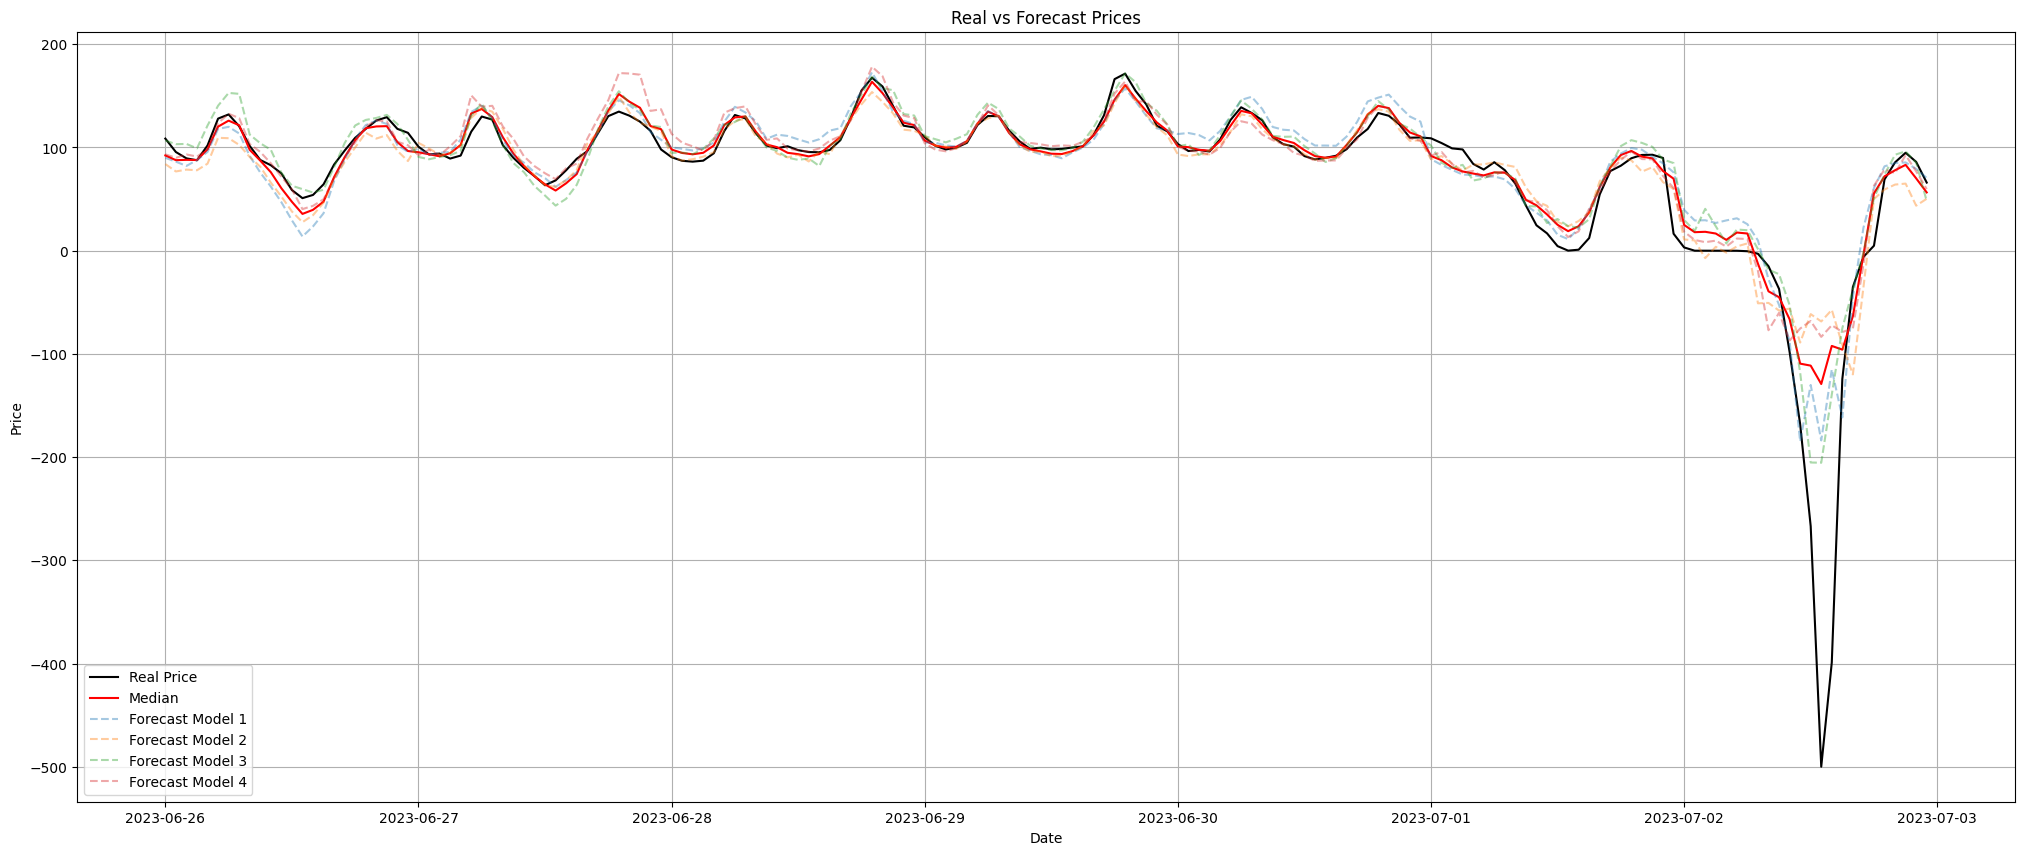

In [39]:
# Plot the real price
plt.figure(figsize=(25, 10))
plt.plot(data['real'], label='Real Price', color='black')
plt.plot(data['bound_50_ensembled'], label='Median', color='red')

# Plot the forecasts
for i in range(1, 5):
    # add transparency to the forecasts
    plt.plot(data[f'forecast_m{i}'], label=f'Forecast Model {i}', linestyle='--' ,alpha=0.4)

# Plot the ensembled forecast
# plt.plot(data['forecast_ensembled'], label='Ensembled Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Real vs Forecast Prices')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Print the days and corresponding values
if not out_of_bounds_days.empty:
    print("Days when the real price is outside the 90% Prediction Intervals:", len(data), len(out_of_bounds_days))
    print(out_of_bounds_days)
else:
    print("The real price is within the 90% Prediction Intervals on all days.")




Days when the real price is outside the 90% Prediction Intervals: 168 5
                       real  forecast_m1  forecast_m2  forecast_m3  \
2023-07-01 23:00:00   16.45    75.905144    59.764019    84.903664   
2023-07-02 12:00:00 -266.92  -130.068512   -61.451244  -205.233292   
2023-07-02 13:00:00 -500.00  -183.800110   -68.561371  -205.462204   
2023-07-02 14:00:00 -399.00  -115.064659   -57.290207  -139.437958   
2023-07-02 18:00:00    4.83    60.835644    50.068649    51.123814   

                     forecast_m4  forecast_ensembled  bound_50_ensembled  \
2023-07-01 23:00:00    60.751488           70.331079           69.779087   
2023-07-02 12:00:00   -68.122101         -116.218787         -111.360111   
2023-07-02 13:00:00   -83.498528         -135.330553         -129.179920   
2023-07-02 14:00:00   -72.190147          -95.995743          -92.271629   
2023-07-02 18:00:00    62.974564           56.250668           55.535639   

                     lower_bound_90_ensembled  upp